In [1]:
import pickle
import numpy as np
import pathlib
import json

In [2]:
dir_path = pathlib.Path('/Users/yang/PycharmProjects/SpeakerVerification-pytorch/Lime/Data/LoResNet8/timit/soft/epoch_12_var_50/epoch_12')
test_lst = list(dir_path.glob('*test*bin'))

In [3]:
test_utt_file = test_lst[0]
test_utt_ids_file = '/Users/yang/PycharmProjects/SpeakerVerification-pytorch/Lime/Data/LoResNet8/timit/soft/epoch_12_var_50/epoch_12/inputs.timit_test.1.json'
with open(test_utt_ids_file, 'r') as f:
    test_utt_ids = json.load(f)


In [4]:
test_utt_ids[:1]

[[['mcmb0-si1898'], ['mcmb0-sx8']]]

In [6]:
test_utt = {}

with open(test_utt_file, 'rb') as f:
    sets = pickle.load(f)
    for idx,(label, grad_a, grad_b, data_a, data_b) in enumerate(sets):
        a_uid = test_utt_ids[idx][0][0]
        b_uid = test_utt_ids[idx][1][0]
        test_utt[a_uid] = (data_a, grad_a)
        test_utt[b_uid] = (data_b, grad_b)

In [8]:
test_utt['mcmb0-si1898']

(array([[-24.044203, -30.508617, -24.882462, ..., -19.745255, -22.997833,
         -22.16636 ],
        [-23.72075 , -24.624554, -26.268229, ..., -19.405285, -19.708391,
         -20.61173 ],
        [-23.46606 , -24.490807, -25.517855, ..., -19.176126, -18.926771,
         -18.401054],
        ...,
        [-24.527462, -25.237467, -22.89416 , ..., -22.712934, -19.786266,
         -19.893198],
        [-21.609514, -21.977568, -23.03727 , ..., -19.173452, -19.10794 ,
         -19.590666],
        [-21.899618, -22.590445, -22.190027, ..., -22.39926 , -21.556753,
         -21.295212]], dtype=float32),
 array([[ 2.89410469e-04,  1.25782055e-04,  2.74601698e-05, ...,
         -1.89977982e-05, -6.14852834e-05, -1.92046646e-05],
        [ 4.13157250e-04,  2.49404024e-04,  7.43869386e-05, ...,
         -2.64672708e-05, -8.25180759e-05, -2.67232863e-05],
        [ 4.93545609e-04,  2.93762772e-04,  8.83587345e-05, ...,
         -2.01404491e-05, -6.66469787e-05, -3.62295782e-06],
        ...,
   

In [25]:
import matplotlib.pyplot as plt
import matplotlib

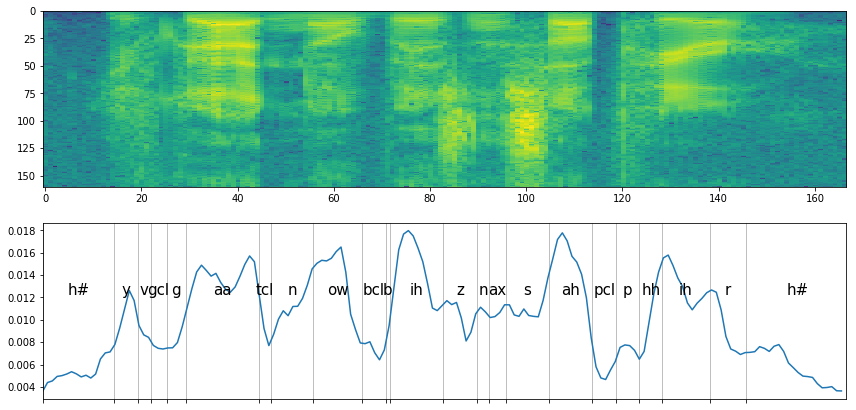

In [44]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(2,1,1)
ax.imshow(test_utt['mcmb0-si1898'][0].transpose(), aspect='auto')

ax = plt.subplot(2,1,2)
utt_grad_relu = np.where(test_utt['mcmb0-si1898'][1].transpose()>0, test_utt['mcmb0-si1898'][1].transpose(), 0)
utt_x = np.arange(0, 167) * 160
ax.plot(utt_x, utt_grad_relu.sum(axis=0))
ax.set_xlim(0, 167* 160) 
break_points = np.array([0, 2381, 3174, 3592, 4119, 4760, 7185, 7603, 9000, 10610, 11400, 11560, 13320, 14440, 14840, 15400, 16840, 18280, 19080, 19840, 20600, 22182, 23400, 26800])
locs = matplotlib.ticker.FixedLocator(break_points)
ax.xaxis.set_major_locator(locs)
ax.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.grid(True, which='major')
ax.set_xlim(0, 167*160) 

break_points_mid = []
for i in range(1, len(break_points)):
    break_points_mid.append((break_points[i]+break_points[i-1])/2.)
    
ys = np.ones(len(break_points_mid)) * 0.012
phonemes = ['h#', 'y', 'v', 'gcl', 'g', 'aa', 'tcl', 'n', 'ow', 'bcl', 'b', 'ih', 'z', 'n', 'ax', 's', 'ah', 'pcl', 'p', 'hh', 'ih', 'r', 'h#']

for i, (x,y) in enumerate(zip(break_points_mid, ys)):
    plt.text(x,y, phonemes[i], ha='center', va='bottom', fontsize=15)

plt.subplots_adjust(left=0.05, right=0.98, top=0.95, bottom=0.05) 
plt.show()

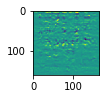

In [ ]:
plt.subplot(3,1,3)
plt.imshow(test_utt['mcmb0-si1898'][1].transpose())